<a href="https://colab.research.google.com/github/AndrewB01/Personal_Finances/blob/main/notebooks/Personal_Expenses_data_consolidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Create Dataframe from Expenses analysis.xlsx file**

In [2]:
df = pd.read_excel('Expenses analysis.xlsx', sheet_name=None)

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


**List all sheets within the Excel file**

In [3]:
# Print all sheet names
df.keys()


dict_keys(['raw data', 'billing data', 'Hoja1', 'Hoja2'])

**Especify data sets for Raw Data and Billing Data sheets**

In [4]:
rd = df['raw data']
bd = df['billing data']


**Review table content and structure rd => Raw Data**

In [5]:
 rd.head()

,Day,Month,Date,Item,Price,Store,QTY,Type,Total
0,vie.,oct,2023-10-13,ajo,1163.0,Fruvar,1,Food Shopping,1163.0
1,vie.,oct,2023-10-13,cebolla cabezona blanca,2145.0,Fruvar,1,Food Shopping,2145.0
2,vie.,oct,2023-10-13,pimenton,1296.0,Fruvar,1,Food Shopping,1296.0
3,vie.,oct,2023-10-13,tomate chonto,3528.0,Fruvar,1,Food Shopping,3528.0
4,vie.,oct,2023-10-13,manzana verde,29637.0,Fruvar,1,Food Shopping,29637.0


**Adjust table to match billing data table structure, reduce granularity by grouping Store and date**

In [6]:
rd = rd.groupby(['Store', 'Date']).agg({'Total': 'sum', 'Type': 'first'})
rd = rd.reset_index()
rd = rd[['Date', 'Store', 'Type', 'Total']]
rd

,Date,Store,Type,Total
0,2024-08-10,Alpina,Restaurant,7500.0
1,2024-09-06,American Eagle,Gift,375840.0
2,2024-08-30,Aportes en linea,Healthcare,386100.0
3,2024-08-30,Apple,Entretaiment,12900.0
4,2024-10-01,Ara,Food Shopping,201336.0
...,...,...,...,...
532,2024-06-22,cabify,Transportation,46892.0
533,2024-06-25,cabify,Transportation,28721.0
534,2024-07-05,cabify,Transportation,11366.0
535,2023-11-18,dollarcity,Food Shopping,52000.0


**Adjust columns dropping unnecesary tables to match Raw Data Tables**

In [7]:
bd = bd.drop(columns=['Day', 'Month', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'])
bd

,Date,Store,Type,Total
0,2024-09-14,Cabify,Transportation,16401
1,2024-09-15,Cabify,Transportation,16030
2,2024-09-15,Cabify,Transportation,19072
3,2024-09-15,Cabify,Transportation,15528
4,2024-09-15,Cabify,Transportation,9925
...,...,...,...,...
574,2025-03-13,NaN,Snack,2600
575,2025-03-14,Oxxo,Snack,6900
576,2025-03-15,Oxxo,Snack,7400
577,2025-11-03,El Chocolo,Snack,10800


**Review data types for Raw data and Billing data**

In [8]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    579 non-null    datetime64[ns]
 1   Store   547 non-null    object        
 2   Type    560 non-null    object        
 3   Total   579 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 18.2+ KB


In [9]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    537 non-null    datetime64[ns]
 1   Store   537 non-null    object        
 2   Type    535 non-null    object        
 3   Total   537 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 16.9+ KB


**Change Total column data type from Billing Data dataframe to match Raw Data dataframe**

In [10]:
bd['Total'] = bd['Total'].astype('float64')


**Union Billing and Raw Dataframes**

In [11]:
raw_df = pd.concat([rd, bd], ignore_index=True)
raw_df


,Date,Store,Type,Total
0,2024-08-10,Alpina,Restaurant,7500.0
1,2024-09-06,American Eagle,Gift,375840.0
2,2024-08-30,Aportes en linea,Healthcare,386100.0
3,2024-08-30,Apple,Entretaiment,12900.0
4,2024-10-01,Ara,Food Shopping,201336.0
...,...,...,...,...
1111,2025-03-13,NaN,Snack,2600.0
1112,2025-03-14,Oxxo,Snack,6900.0
1113,2025-03-15,Oxxo,Snack,7400.0
1114,2025-11-03,El Chocolo,Snack,10800.0


**Transform Store and Type data to lower case and remove spaces to the right and left**

In [12]:
raw_df['Store'] = raw_df['Store'].str.strip().str.lower()
raw_df['Type'] = raw_df['Type'].str.strip().str.lower()
raw_df





,Date,Store,Type,Total
0,2024-08-10,alpina,restaurant,7500.0
1,2024-09-06,american eagle,gift,375840.0
2,2024-08-30,aportes en linea,healthcare,386100.0
3,2024-08-30,apple,entretaiment,12900.0
4,2024-10-01,ara,food shopping,201336.0
...,...,...,...,...
1111,2025-03-13,NaN,snack,2600.0
1112,2025-03-14,oxxo,snack,6900.0
1113,2025-03-15,oxxo,snack,7400.0
1114,2025-11-03,el chocolo,snack,10800.0


**Create a new data frame and generate a table view with Type and Store**

In [13]:
raw_df_relation = raw_df.groupby(['Type', 'Store']).size().reset_index(name='Count')

raw_df_relation


,Type,Store,Count
0,agua,agua,1
1,beauty,barberia,2
2,beauty,mustaches,1
3,beauty,peluqueria,1
4,brunch,grand hyatt,1
...,...,...,...
274,utilities,tigo,2
275,utilities,vanti,3
276,utility,enel,1
277,utility,tigo,1


**Sort Store information and display unique values to identify misppeling and similar errors**

In [14]:
raw_df = raw_df.sort_values(by=['Store'])
raw_df_relation = raw_df['Store'].unique()
raw_df_relation

array(['acueducto', 'admon tds', 'agua', 'alparke', 'alpina',
       'amazon.com', 'american cheese cake', 'american eagle',
       'andres dc', 'aportes en linea', 'apple', 'ara', 'archies',
       'arepas y embueltos', 'arreglo bici', 'aseo', 'bacu', 'bagel shop',
       'barberia', 'baskin robbins', 'bono colsanitas',
       'bono medisanitas', 'bono sanitas', 'brasa roja', 'brissa',
       'bubu burger', 'bufalo wings', 'buffalo wings', 'burger king',
       'burguer king', 'cabify', 'cafe quindio', 'canva', 'car renting',
       'carbon & xilvestre', 'carbon place', 'carbon y xilvestre',
       'carnal', 'carulla', 'casa ideas', 'casa paella',
       'central parking', 'certificado l&t', 'charlotte pasteleria',
       'cinabond', 'cinecolombia', 'cinema viziona', 'cinemark',
       'cinepolis', 'clase dibujo', 'clinica del colon', 'coctel del mar',
       'coliseo live', 'colo colo café', 'colsanitas', 'colsubsicio',
       'comercial papelera', 'compensar', 'corral', 'corral gour

**Create a corrections dictionary and apply to Store names**

In [15]:
store_corrections = {
    "bufalo wings": "buffalo wings",
    "crepes & waffle": "crepes & waffles",
    "dunkin": "dunkin donuts",
    "corral": "el corral",
    "dunot factory": "donut factory",
    "vital home - food": "vital home",
    "minca - taller": "minca",
    "la 75": "la75",
    "apple": "icloud",
    "gas tds": "vanti",
    "sanitas premium": "eps premium",
    "uber - pet": "uber",
    "icloid": "icloud",
    "ellinika": "nectaria",
    "cinabond": "foodology",
    "little caesrs": "little caesar",
    "sanitas": "bono eps",
    "guru": "gurus",
    "oxo": "oxxo",
    "carnal": "el carnal",
    "stabucks": "starbucks",
    "rappi - mcdonalds": "rappi",
    "burguer king": "burger king",
    "burger king'": "burger king",
    "luz tds": "enel",
    "carbon y xilvestre": "carbon & xilvestre",
    "colsubsicio": "colsubsidio",
    "decathelon": "decathalon",
    "disney +": "disney+",
    "don rom": "don romero",
    "exito wow": "exito",
    "kuty": "kutty",
    "la burra del gordo": "la birra del gordo",
    "sipote": "sipote burrito",
    "suchi nogal": "sushi nogal",
    "vital home": "vitalhome"
}

raw_df['Store'] = raw_df['Store'].replace(store_corrections)

**Sort Type  information and display unique values to identify misppeling and similar errors**

In [16]:
raw_df = raw_df.sort_values(by=['Type'])
raw_df_relation = raw_df['Type'].unique()
raw_df_relation

array(['agua', 'beauty', 'brunch', 'cellphone service', 'clothing',
       'custome', 'delivery', 'dog', 'dog care', 'dog food', 'dogs',
       'entretaiment', 'entretainment', 'food shopping', 'gift', 'gym',
       'healthcare', 'home shopping', 'homeshoping', 'medicine',
       'nutricionist', 'papeleria', 'parking', 'parra', 'restaurant',
       'restaurants', 'snack', 'storage', 'thanksgiving', 'training',
       'transportation', 'utilities', 'utility', nan, None], dtype=object)

**Create a corrections dictionary and apply to Type names**

In [17]:
type_corrections = {
    "brunch": "restaurant",
    "utility": "utilities",
    "parra": "prestamo",
    "restaurants": "restaurant",
    "cellphone service": "utilities",
    "nutricionist": "healthcare",
    "dog food": "dog",
    "dog care": "dog",
    "dogs": "dog",
    "entretaiment": "entertainment",
    "entretainment": "entertainment",
    "food shopping": "groceries",
    "homeshoping": "home shopping",
    "medicine": "healthcare",
    "custome": "gift",
    "agua": "groceries",
    "delivery": "transportation",
    "storage": "cloud services",
    "gym": "healthcare",
    "thanksgiving": "party"
}

raw_df['Type'] = raw_df['Type'].replace(type_corrections)

**Correct Store and wrong Type**

In [18]:
raw_df.loc[(raw_df['Store'] == 'd1') & (raw_df['Type'] == 'dog'), 'Type'] = 'pet'
raw_df.loc[(raw_df['Store'] == 'daflores') & (raw_df['Type'] == 'entretainment'), 'Type'] = 'gift'
raw_df.loc[(raw_df['Store'] == 'farmatodo') & (raw_df['Type'] == 'entretainment'), 'Type'] = 'healthcare'
raw_df.loc[(raw_df['Store'] == 'icloud') & (raw_df['Type'] == 'entretainment'), 'Type'] = 'cloud services'
raw_df.loc[(raw_df['Store'] == 'jumbo') & (raw_df['Type'] == 'entretainment'), 'Type'] = 'groceries'
raw_df.loc[(raw_df['Store'] == 'la tienda papelera') & (raw_df['Type'] == 'entretainment'), 'Type'] = 'papeleria'
raw_df.loc[(raw_df['Store'] == 'panamericana') & (raw_df['Type'] == 'entretainment'), 'Type'] = 'papeleria'
raw_df.loc[(raw_df['Store'] == 'toysmart') & (raw_df['Type'] == 'entretainment'), 'Type'] = 'gift'
raw_df.loc[(raw_df['Store'] == 'verona') & (raw_df['Type'] == 'groceries'), 'Type'] = 'snack'
raw_df.loc[(raw_df['Store'] == 'tostao') & (raw_df['Type'] == 'groceries'), 'Type'] = 'snack'
raw_df.loc[(raw_df['Store'] == 'cruz verde') & (raw_df['Type'] == 'groceries'), 'Type'] = 'healthcare'
raw_df.loc[(raw_df['Store'] == 'bacu') & (raw_df['Type'] == 'groceries'), 'Type'] = 'restaurant'
raw_df.loc[(raw_df['Store'] == 'starbucks') & (raw_df['Type'] == 'gift'), 'Type'] = 'snack'
raw_df.loc[(raw_df['Store'] == 'h&m') & (raw_df['Type'] == 'gift'), 'Type'] = 'clothing'
raw_df.loc[(raw_df['Store'] == 'minca') & (raw_df['Type'] == 'gift'), 'Type'] = 'transportation'
raw_df.loc[(raw_df['Store'] == 'inkanta') & (raw_df['Type'] == 'none'), 'Type'] = 'home shopping'
raw_df.loc[(raw_df['Store'] == 'panamericana') & (raw_df['Type'] == 'none'), 'Type'] = 'papeleria'
raw_df.loc[(raw_df['Store'] == 'comercial papelera') & (raw_df['Type'] == 'gift'), 'Type'] = 'papeleria'

**Filter to validate specific information in a given column**

In [147]:
filtered_df = raw_df[raw_df['Store'] == 'daflores']
filtered_df

,Date,Store,Type,Total
210,2024-08-30,daflores,entertainment,134800.0


##**Data Analsys**##

<ipython-input-34-71868dca8c88>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=type_distribution.index, y=type_distribution.values, ax=ax, palette="viridis")


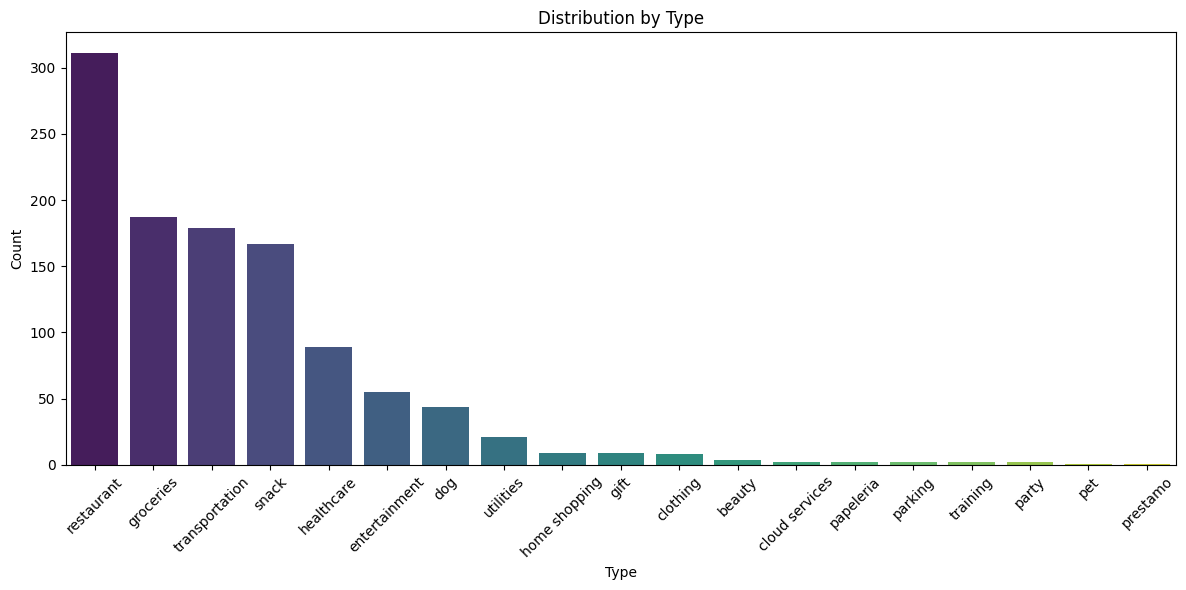

In [34]:
# Create a figure and axes for the subplots
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figsize as needed

# Bar graph for distribution by Type
type_distribution = raw_df['Type'].value_counts()
bar_plot = sns.barplot(x=type_distribution.index, y=type_distribution.values, ax=ax, palette="viridis")

ax.set_title('Distribution by Type (Frequency)')
ax.set_xlabel('Type')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


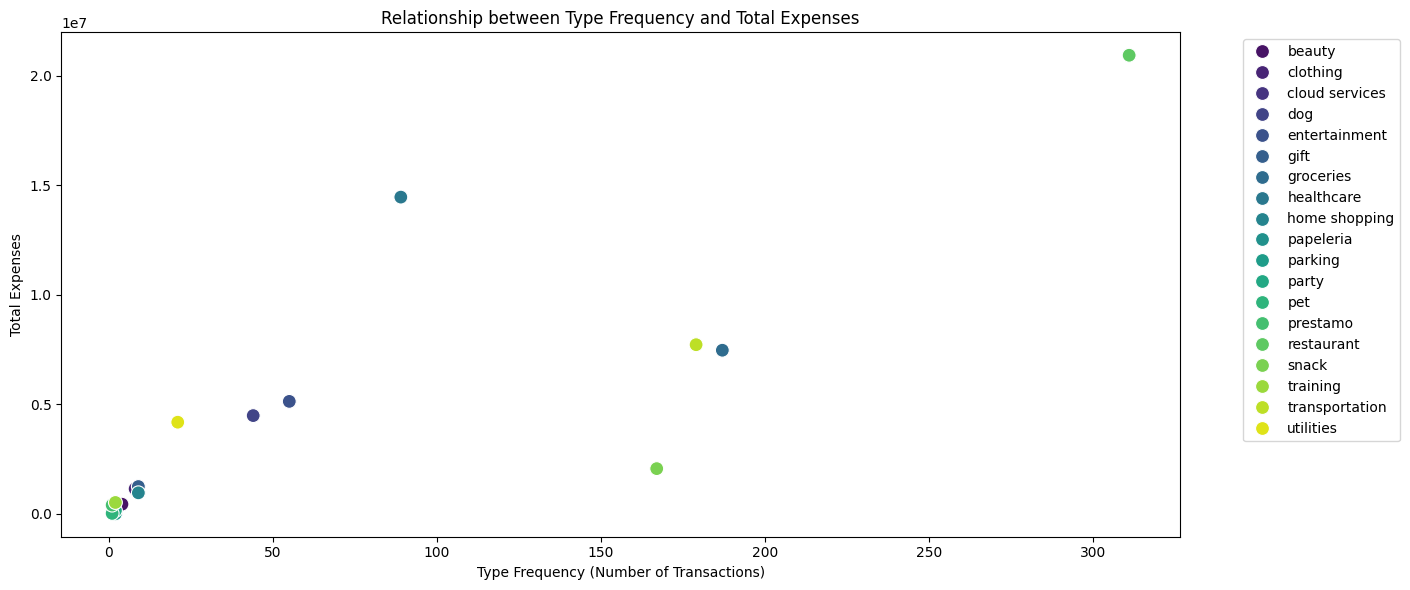

In [50]:
# Calculate total expenses for each Type
type_expenses = raw_df.groupby('Type')['Total'].sum().reset_index()

# Calculate frequency of each Type
type_frequency = raw_df['Type'].value_counts().reset_index()
type_frequency.columns = ['Type', 'Frequency']

# Merge total expenses and frequency data
type_data = pd.merge(type_expenses, type_frequency, on='Type', how='left')
type_data = type_data.rename(columns={'Total': 'Total Expenses'})

# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='Frequency', y='Total Expenses', data=type_data, ax=ax,hue='Type', palette="viridis", s=100)

ax.set_title('Relationship between Type Frequency and Total Expenses')
ax.set_xlabel('Type Frequency (Number of Transactions)')
ax.set_ylabel('Total Expenses')

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [28]:
len(raw_df['Store'].unique())

207

<ipython-input-33-4cbeb46e707c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=type_distribution.index, y=type_distribution.values, ax=ax, palette="viridis")


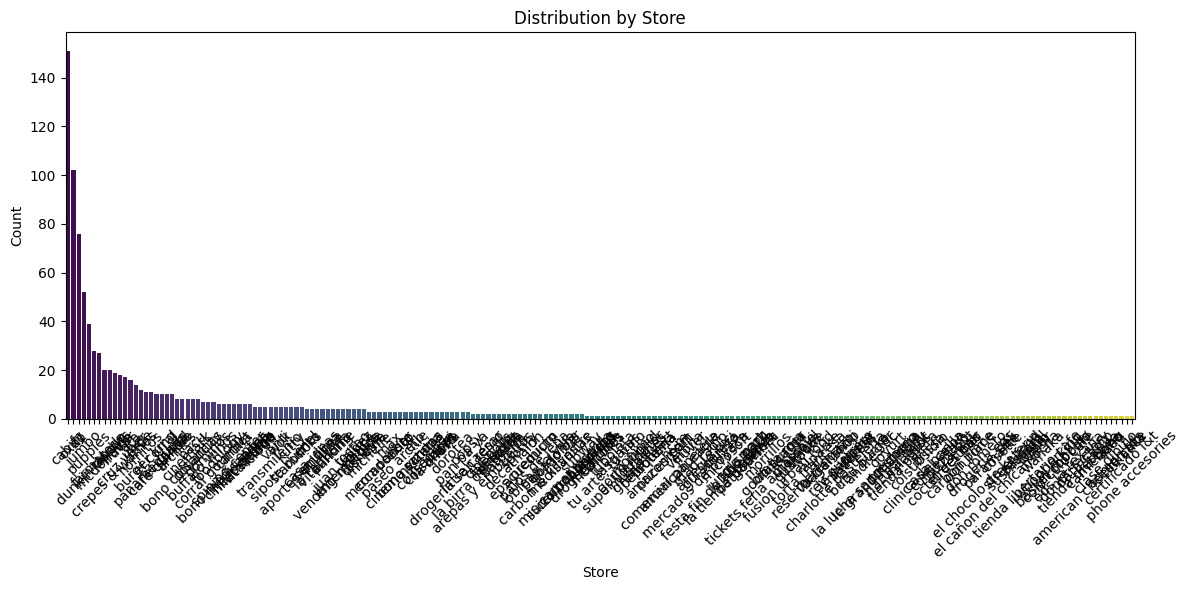

In [33]:
# Create a figure and axes for the subplots
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figsize as needed

# Bar graph for distribution by Type
type_distribution = raw_df['Store'].value_counts()
bar_plot = sns.barplot(x=type_distribution.index, y=type_distribution.values, ax=ax, palette="viridis")

ax.set_title('Distribution by Store')
ax.set_xlabel('Store')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

<ipython-input-40-ae27222f274a>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Frequency', y='Total Expenses', data=store_data, ax=ax, palette="viridis")


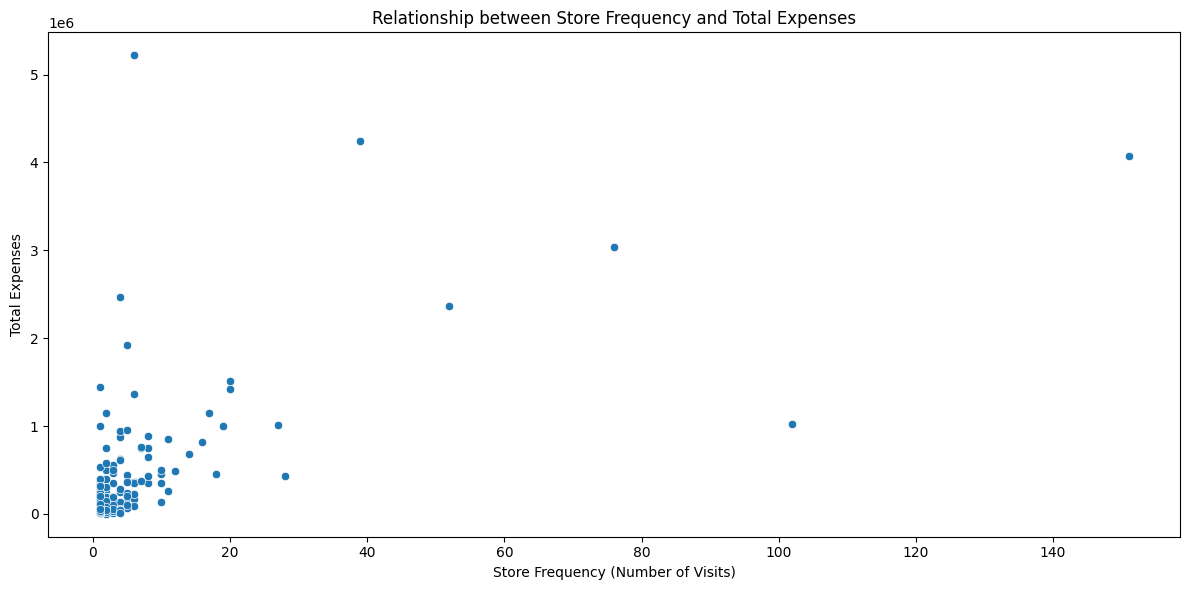

In [40]:
# Calculate total expenses for each store
store_expenses = raw_df.groupby('Store')['Total'].sum().reset_index()

# Merge this data with store frequency
# Changed 'index' to 'Store' in right_on parameter
store_data = pd.merge(store_expenses, raw_df['Store'].value_counts().reset_index(),
                     left_on='Store', right_on='Store', how='left')
store_data = store_data.rename(columns={'Store_x': 'Store', 'Total': 'Total Expenses', 'count': 'Frequency'})

# Create a figure and axes for the subplots
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figsize as needed

# Create the scatter plot
sns.scatterplot(x='Frequency', y='Total Expenses', data=store_data, ax=ax, palette="viridis")

ax.set_title('Relationship between Store Frequency and Total Expenses')
ax.set_xlabel('Store Frequency (Number of Visits)')
ax.set_ylabel('Total Expenses')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

<ipython-input-36-393844ee1439>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=top_stores.index, y=top_stores.values, ax=ax, palette="viridis")


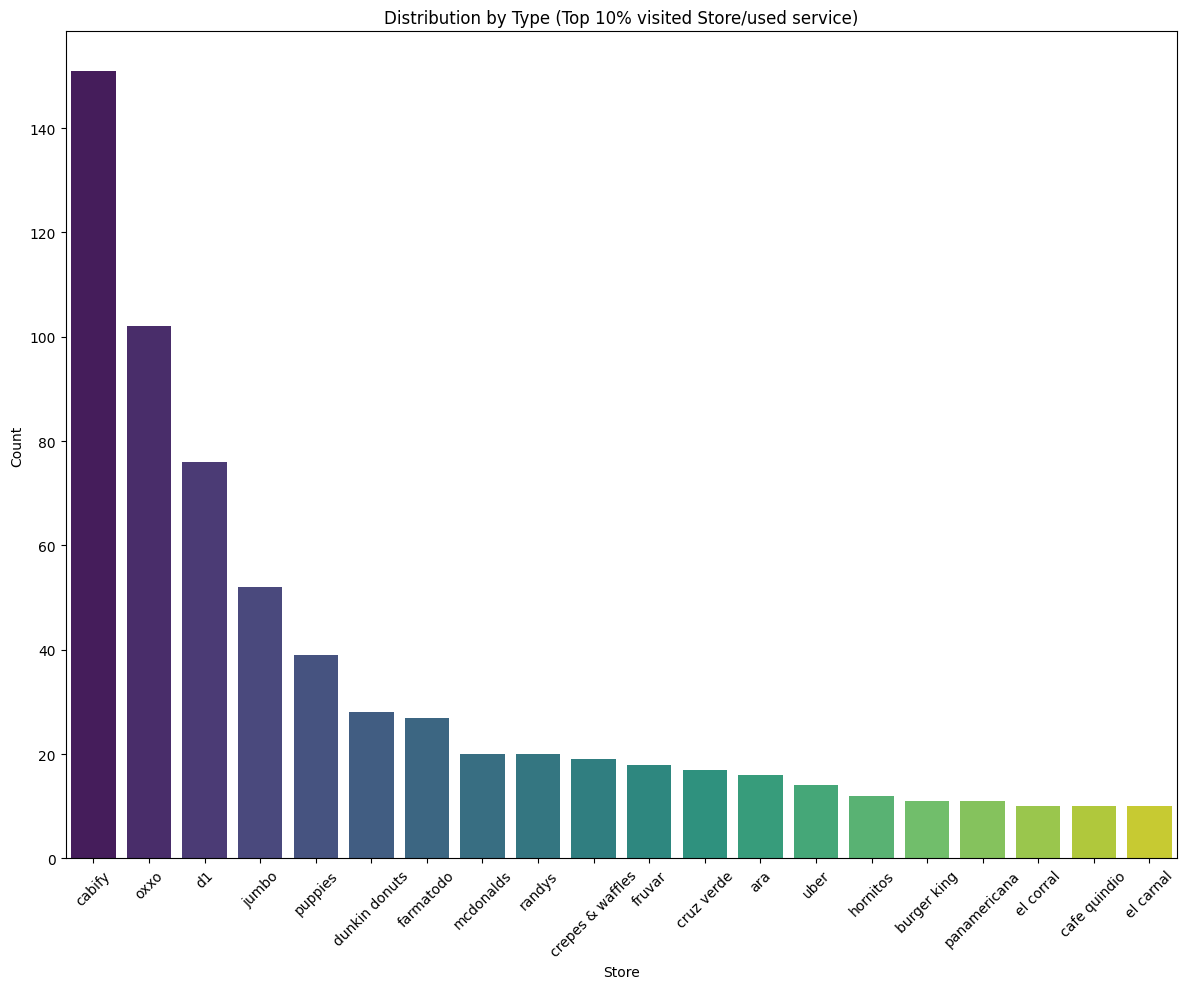

In [36]:
# Create a figure and axes for the subplots
fig, ax = plt.subplots(figsize=(12, 10))  # Adjust figsize as needed

# Bar graph for distribution by Type
type_distribution = raw_df['Store'].value_counts()

# Calculate the number of stores representing the top 10%
n_top_stores = int(len(type_distribution) * 0.10)

# Get the top 10% stores and their counts
top_stores = type_distribution.head(n_top_stores)


bar_plot = sns.barplot(x=top_stores.index, y=top_stores.values, ax=ax, palette="viridis")

ax.set_title('Distribution by Type (Top 10% visited Store/used service)')
ax.set_xlabel('Store')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

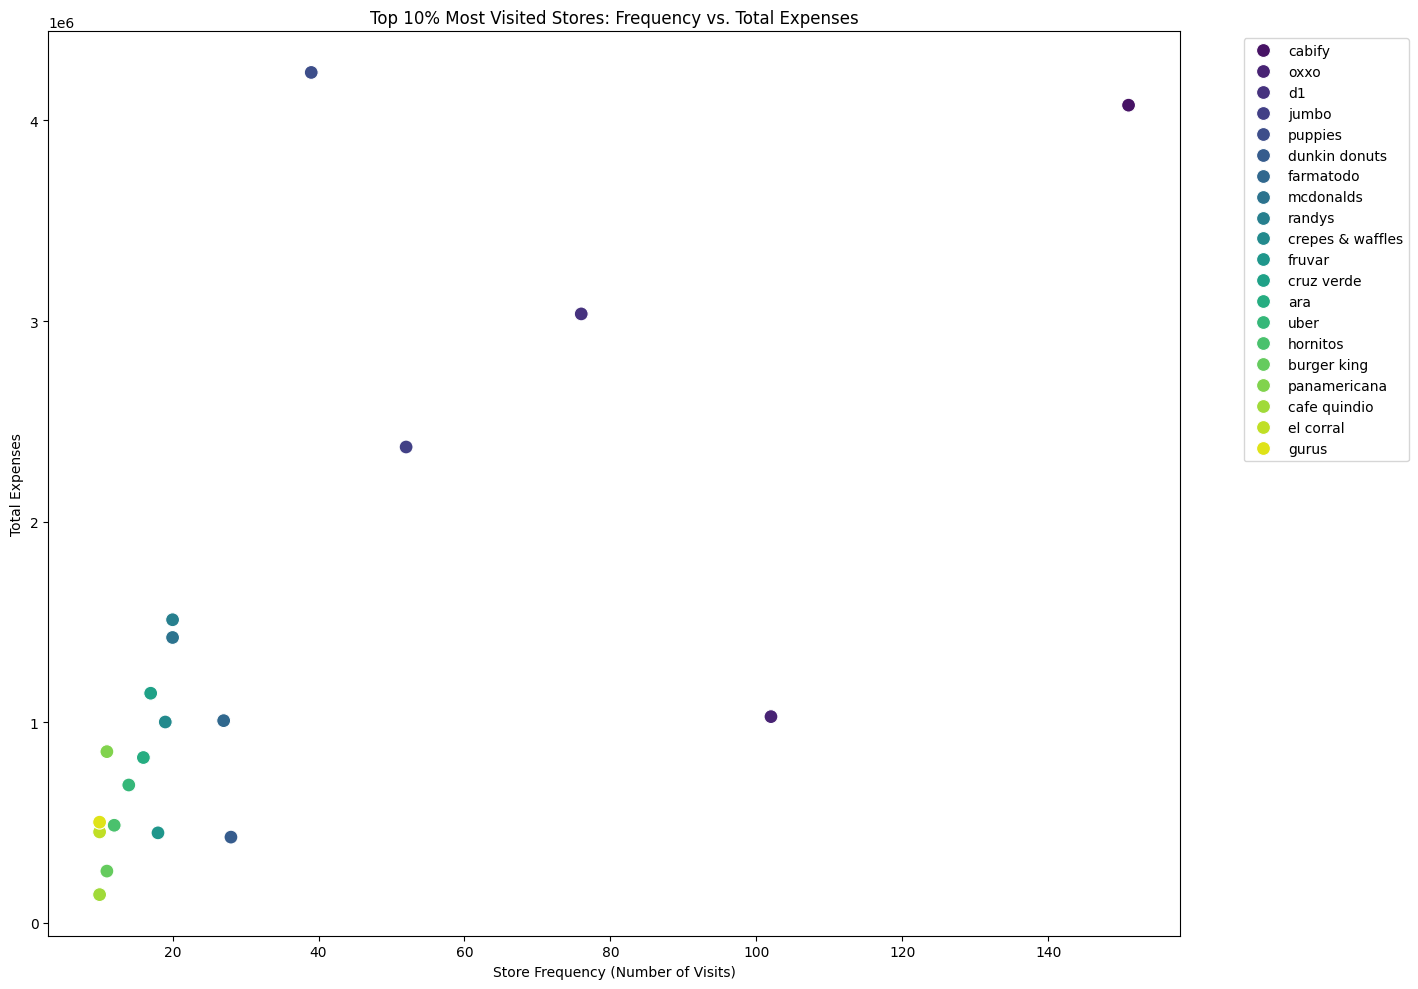

In [44]:
# Calculate total expenses for each store to be used as y axis in the scatter plot
store_expenses = raw_df.groupby('Store')['Total'].sum().reset_index()

# Merge this data with store frequency to combine frequency and total expenses
store_data = pd.merge(store_expenses, raw_df['Store'].value_counts().reset_index(),
                     left_on='Store', right_on='Store', how='left')
store_data = store_data.rename(columns={'Store_x': 'Store', 'Total': 'Total Expenses', 'count': 'Frequency'})


# Calculate the number of stores representing the top 10%
n_top_stores = int(len(store_data) * 0.10)

# Get the top 10% stores and their counts
top_stores_data = store_data.sort_values(by=['Frequency'],ascending=False).head(n_top_stores)


# Create a figure and axes for the subplots
fig, ax = plt.subplots(figsize=(12, 10))  # Adjust figsize as needed

# Create the scatter plot
# x-axis: Store Frequency, y-axis: Total Expenses, data: top_stores_data
sns.scatterplot(x='Frequency', y='Total Expenses', data=top_stores_data, ax=ax, palette="viridis", hue='Store', s=100)

ax.set_title('Top 10% Most Visited Stores: Frequency vs. Total Expenses')
ax.set_xlabel('Store Frequency (Number of Visits)')
ax.set_ylabel('Total Expenses')

# Adjust layout and display the plots
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
plt.show()

**Create new file with data transformation and data clean for BI Analysis in Power BI**

In [51]:
# Save the DataFrame to a excel file
raw_df.to_excel('Expenses_raw_data.xlsx', index=False)
# Save the DataFrame to a CSV file
raw_df.to_csv('Expenses_raw_data.csv', index=False)